In [191]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams, font_manager
from nltk.corpus import stopwords
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.tokenize import word_tokenize
rcParams['font.family'] = 'tahoma'

In [192]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nonthapatkaewamporn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [193]:
df = pd.read_csv('data/22.24.04_TH_videos.csv')
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,Minecraft|มายคราฟ|เอาชีวิตรอด 100วัน|Minecraft...,390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,False,True,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,น้ำหอมดิออร์มันอยู่ที่คอ|รันเดอะทาว|F.HERO|Spr...,1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,False,True,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,kodey|แม่เราชัดๆ|วัยรุ่น|contrast|ความแตกต่าง|...,739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,False,True,https://www.facebook.com/Gooddayofficial-22080...
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[none],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,False,True,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,ได้อยู่|แก่น|โอ๊ตปราโมทย์|OatPramote|MILLI|KHO...,877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,False,True,Produced by Janpat MontrelerdrasmeLyric & Comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E_T8ywo5SEo,1MILL - 1 of 1 (Official Music VIdeo),2022-04-19T17:58:13Z,UC9XnG68APlP7HaI6y5NU9TQ,1 MILL,10,22.24.04,1MILL|1of1|ONLY1!,281578,0,0,1057,https://i.ytimg.com/vi/E_T8ywo5SEo/default.jpg,False,True,#1MILL #ONLY1! #SEASON #1OF1Song Title : 1 of ...
196,XXe-tAlcfPQ,โรงเรียนสุดป่วน SS3 - #1 เปิดเทอมวันแรกด้วยวิช...,2022-04-20T10:00:17Z,UCXALRk2-YkcpHSm_ZSvZqfw,Deklaaon Channel,20,22.24.04,เกม|พี่บีพี่ไวท์|พี่ไวท์|พี่บี|พี่ไวท์พี่บี|เจ...,246629,0,0,1243,https://i.ytimg.com/vi/XXe-tAlcfPQ/default.jpg,False,True,#DeklaaonChannel #MinecraftSchoolSS3Minecraft ...
197,-lRCopNtvE0,ช่วยเสแสร้ง - วงทัพห้า [Official Audio],2022-04-19T09:00:12Z,UCgWs2X79I4fsVQtIWXwfMgw,วงทัพห้า OFFICIAL,10,22.24.04,ช่วยเสแสร้ง|วงทัพห้า|โอม วงทัพห้า|ช่วยเสแสร้ง ...,148151,0,0,365,https://i.ytimg.com/vi/-lRCopNtvE0/default.jpg,False,True,เพลง : ช่วยเสแสร้งศิลปิน : วงทัพห้าคำร้อง/ทำนอ...
198,_7vquiiNHAg,ตะลุยงาน Media day ครั้งแรกของสังกัด Attack Al...,2022-04-21T09:00:12Z,UCRdfappjrS_7AUZ1vlZilag,Edwin Official,24,22.24.04,Vlog|AAA,169147,0,0,203,https://i.ytimg.com/vi/_7vquiiNHAg/default.jpg,False,True,การรวมตัวครั้งยิ่งใหญ่ของสังกัด AttackAllAroun...


In [194]:
cat_id_to_word = {
    1: "Fiel & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers",
}

In [195]:
#set string as date time type for publishedAt

df["upload_days_before_trending"] = (pd.to_datetime(df["trending_date"], format="%y.%d.%m") - pd.to_datetime(pd.to_datetime(df["publishedAt"], format="%Y-%m-%dT%H:%M:%SZ").dt.date)).dt.days
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,upload_days_before_trending
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,Minecraft|มายคราฟ|เอาชีวิตรอด 100วัน|Minecraft...,390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,False,True,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,1
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,น้ำหอมดิออร์มันอยู่ที่คอ|รันเดอะทาว|F.HERO|Spr...,1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,False,True,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,2
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,kodey|แม่เราชัดๆ|วัยรุ่น|contrast|ความแตกต่าง|...,739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,False,True,https://www.facebook.com/Gooddayofficial-22080...,2
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[none],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,False,True,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,1
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,ได้อยู่|แก่น|โอ๊ตปราโมทย์|OatPramote|MILLI|KHO...,877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,False,True,Produced by Janpat MontrelerdrasmeLyric & Comp...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E_T8ywo5SEo,1MILL - 1 of 1 (Official Music VIdeo),2022-04-19T17:58:13Z,UC9XnG68APlP7HaI6y5NU9TQ,1 MILL,10,22.24.04,1MILL|1of1|ONLY1!,281578,0,0,1057,https://i.ytimg.com/vi/E_T8ywo5SEo/default.jpg,False,True,#1MILL #ONLY1! #SEASON #1OF1Song Title : 1 of ...,5
196,XXe-tAlcfPQ,โรงเรียนสุดป่วน SS3 - #1 เปิดเทอมวันแรกด้วยวิช...,2022-04-20T10:00:17Z,UCXALRk2-YkcpHSm_ZSvZqfw,Deklaaon Channel,20,22.24.04,เกม|พี่บีพี่ไวท์|พี่ไวท์|พี่บี|พี่ไวท์พี่บี|เจ...,246629,0,0,1243,https://i.ytimg.com/vi/XXe-tAlcfPQ/default.jpg,False,True,#DeklaaonChannel #MinecraftSchoolSS3Minecraft ...,4
197,-lRCopNtvE0,ช่วยเสแสร้ง - วงทัพห้า [Official Audio],2022-04-19T09:00:12Z,UCgWs2X79I4fsVQtIWXwfMgw,วงทัพห้า OFFICIAL,10,22.24.04,ช่วยเสแสร้ง|วงทัพห้า|โอม วงทัพห้า|ช่วยเสแสร้ง ...,148151,0,0,365,https://i.ytimg.com/vi/-lRCopNtvE0/default.jpg,False,True,เพลง : ช่วยเสแสร้งศิลปิน : วงทัพห้าคำร้อง/ทำนอ...,5
198,_7vquiiNHAg,ตะลุยงาน Media day ครั้งแรกของสังกัด Attack Al...,2022-04-21T09:00:12Z,UCRdfappjrS_7AUZ1vlZilag,Edwin Official,24,22.24.04,Vlog|AAA,169147,0,0,203,https://i.ytimg.com/vi/_7vquiiNHAg/default.jpg,False,True,การรวมตัวครั้งยิ่งใหญ่ของสังกัด AttackAllAroun...,3


In [196]:
df["category"] = df["categoryId"].map(cat_id_to_word)
df["category"]

0              Gaming
1               Music
2      People & Blogs
3              Gaming
4               Music
            ...      
195             Music
196            Gaming
197             Music
198     Entertainment
199     Entertainment
Name: category, Length: 200, dtype: object

<AxesSubplot:>

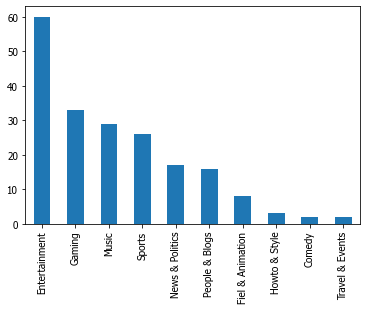

In [197]:
df["category"].value_counts().nlargest(10).plot(kind="bar")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_tags', ylabel='count'>

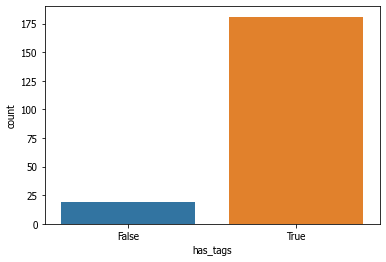

In [198]:
df["has_tags"] = df["tags"] != "[none]"
sns.countplot(df["has_tags"])

In [199]:
df[df["has_tags"]]["view_count"].describe()

count    1.810000e+02
mean     1.011844e+06
std      5.010052e+06
min      0.000000e+00
25%      1.192490e+05
50%      2.656720e+05
75%      5.906480e+05
max      6.301623e+07
Name: view_count, dtype: float64

In [200]:
df[df["has_tags"] == False]["view_count"].describe()

count    1.900000e+01
mean     4.695541e+05
std      4.826451e+05
min      2.686500e+04
25%      8.948850e+04
50%      2.702820e+05
75%      6.035000e+05
max      1.979277e+06
Name: view_count, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='upload_days_before_trending', ylabel='count'>

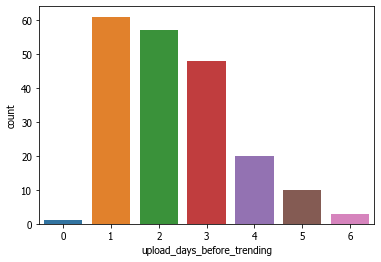

In [201]:
sns.countplot(df["upload_days_before_trending"])

In [202]:
# get list of duplicate channelTitle
df["channelTitle"].value_counts().loc[lambda x: x>1]


Thairath Online                    3
Star Hunter Entertainment          3
one31                              3
TrueVisionsOfficial                3
HEARTROCKER                        3
Mandee Channel                     3
WorkpointOfficial                  3
Garena RoV Thailand                3
PUBG MOBILE Thailand               2
Epic Time                          2
High Cloud Entertainment           2
zbing z.                           2
Nadao Music                        2
ฟุตบอล108                          2
News1                              2
ZENTYARB                           2
PPTV HD 36                         2
Oppa Thuchy                        2
Bie The Ska                        2
My Mate Nate                       2
GOTJISIRI CH                       2
Lovely Kids Thailand               2
Whale Tube                         2
GRAMMY GOLD OFFICIAL               2
มวยเด็ด789                         2
ฟุตบอลจีเนียส                      2
Liverpool FC                       2
โ

In [203]:
df["upload_days_before_trending"].describe()

count    200.000000
mean       2.335000
std        1.245202
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: upload_days_before_trending, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='comments_disabled', ylabel='count'>

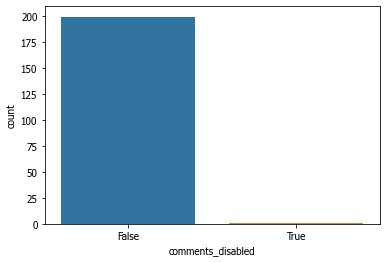

In [204]:
sns.countplot(df["comments_disabled"])

<AxesSubplot:xlabel='category', ylabel='view_count'>

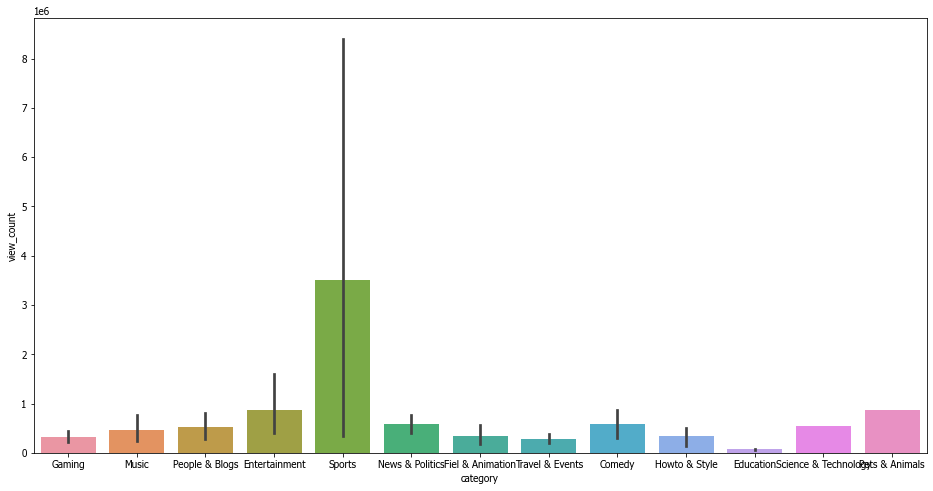

In [205]:
plt.figure(figsize=(16,8))
sns.barplot(x=df["category"], y=df["view_count"])

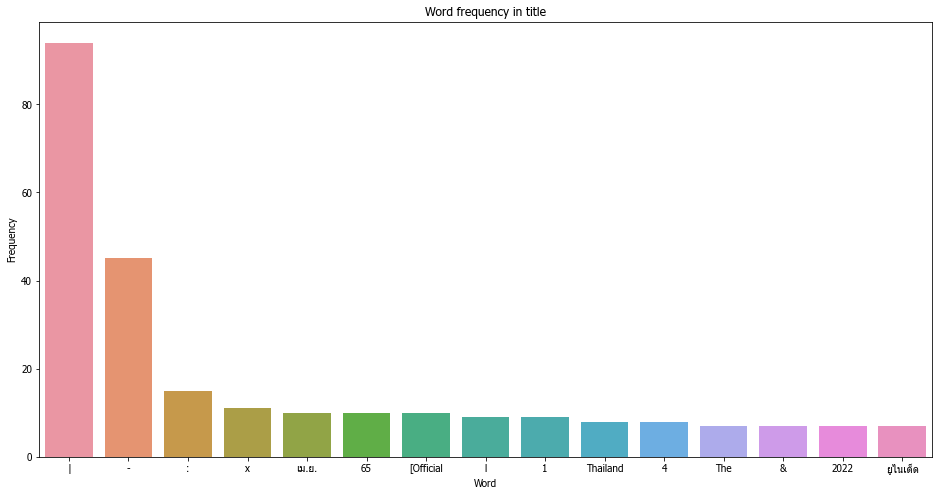

In [206]:
freq = df["title"].str.split(expand=True).stack().value_counts().nlargest(15)
plt.figure(figsize=(16,8))
plot = sns.barplot(x=freq.keys(), y=freq.values)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Word frequency in title")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9658 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127386 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9658 missing from current font.
  font.set_text(s, 0, flags=flags)


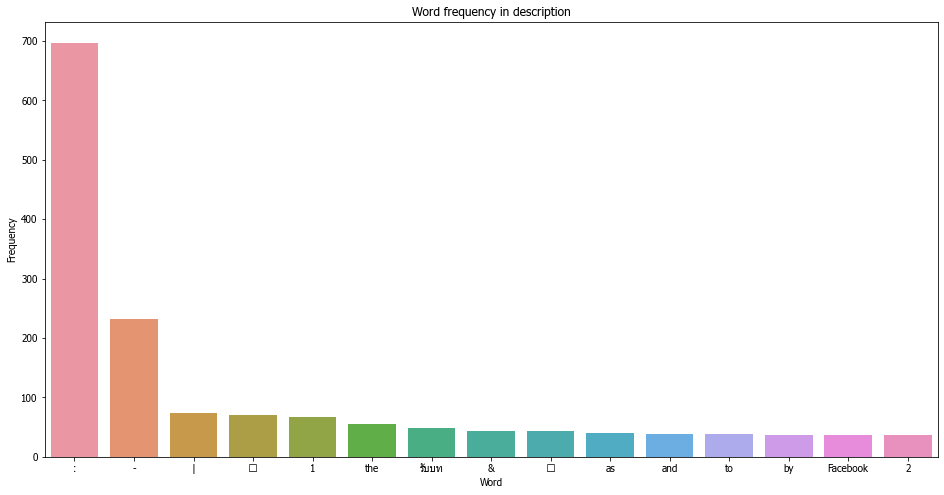

In [207]:
freq = df["description"].str.split(expand=True).stack().value_counts().nlargest(15)
plt.figure(figsize=(16,8))
plot = sns.barplot(x=freq.keys(), y=freq.values)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Word frequency in description")
plt.show()

In [208]:
#word_tokenize(df.loc[4]["title"], engine="newmm")
custom_stopwords = {
    "Official",
    "MV",
    "feat",
    "X",
}
stop_words = list(set(stopwords.words('english')).union(set(thai_stopwords())).union(custom_stopwords))
def tokenize(text):
    text = re.sub(r'((http)\S+)',' ',text)
    tokenized_text = word_tokenize(normalize(re.sub(r"[^\w\s\u0E00-\u0E7F]","",text)), engine="newmm")
    tokenized_filtered_text = [word for word in tokenized_text if word not in stop_words]
    return tokenized_filtered_text

In [209]:
df["description"] = df["description"].fillna("[]")

In [210]:
df["tokenized_description"] = df["description"].apply(tokenize)
df["tokenized_description"]

0      [เข้าร่วม,  , 172,  , เพชร, เงินสด, มูลค่า,  ,...
1      [WE,  , ARE,  , READY,  , TO,  , RUNTHETOWN,  ...
2      [0914651959,  , papitchayatslmcoth, โลก, GPSGo...
3      [LIVE,  , ศึก, ชิง, ตั๋ว, ทีม,  , 2,  ,  , AIC...
4      [Produced,  ,  , Janpat,  , MontrelerdrasmeLyr...
                             ...                        
195    [1, MILL,  , ONLY, 1,  , SEASON,  , 1, OF, 1, ...
196    [DeklaaonChannel,  , MinecraftSchoolSS, 3, Min...
197    [เพลง,  , เสแสร้ง, ศิลปิน,  , วง, ทัพ, ห้า, คำ...
198    [รวมตัว, สังกัด,  , AttackAllAround,  ,  , 70,...
199    [กระแส, ข้าวเหนียว, มะม่วง,  , มาแรง,  , ผม, ท...
Name: tokenized_description, Length: 200, dtype: object

In [211]:
def word_cloud(df_col, plt_title):
    regexp = r"[ก-๙a-zA-Z']+"
    wordcloud = WordCloud(
        background_color="white", 
        font_path="/Users/nonthapatkaewamporn/Library/Fonts/THSarabunNew.ttf",
        font_step=4,
        collocations=False,
        regexp=regexp,
        stopwords=stop_words,
        max_words=100
        ).generate(" ".join(df_col.apply(lambda x: re.sub(r"\s+"," "," ".join(x)))))
    plt.figure(figsize = (15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(plt_title)
    plt.axis('off')
    plt.show()

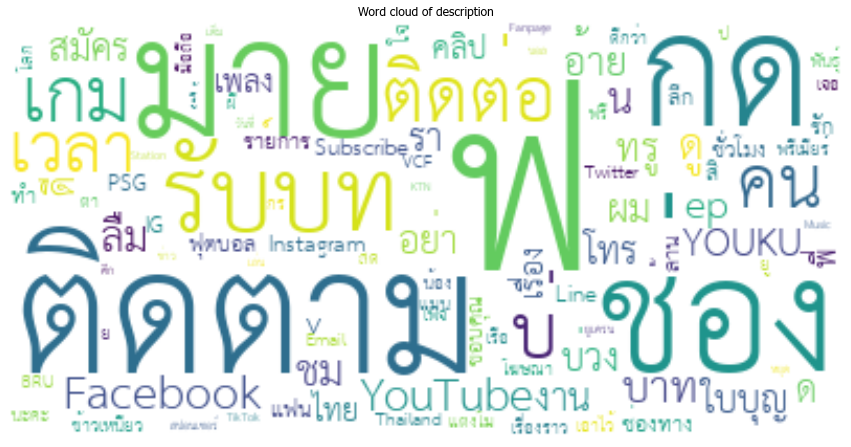

In [212]:
word_cloud(df["tokenized_description"], "Word cloud of description")

In [213]:
df["tokenized_title"] = df["title"].apply(tokenize)
df["tokenized_title"]

0      [เอาชีวิต, รอด,  , 100,  ,  , HARDCORE,  , Min...
1      [FHERO,  , x,  , VannDa,  , Ft,  , 1, MILL,  ,...
2      [ซอย, ชื่อ, แปลก,  , หลง, พิธีกร,  , แขกรับเชิ...
3      [LIVE,  , ศึก, คัดเลือก, ตัวแทน, ไทย,  , AIC, ...
4              [ , โอ๊ต,  , ปราโมทย์,  ,  , MILLI,  ,  ]
                             ...                        
195      [1, MILL,  , 1,  ,  , 1,  ,  , Music,  , VIdeo]
196    [โรงเรียน, ป่วน,  , SS, 3,  , 1,  , เปิดเทอม, ...
197              [เสแสร้ง,  , วง, ทัพ, ห้า,  ,  , Audio]
198    [ตะลุย, งาน,  , Media,  , day,  , ครั้งแรก, สั...
199    [ข้าวเหนียว, มะม่วง,  , ราด, กะทิ,  , ราด, อร่...
Name: tokenized_title, Length: 200, dtype: object

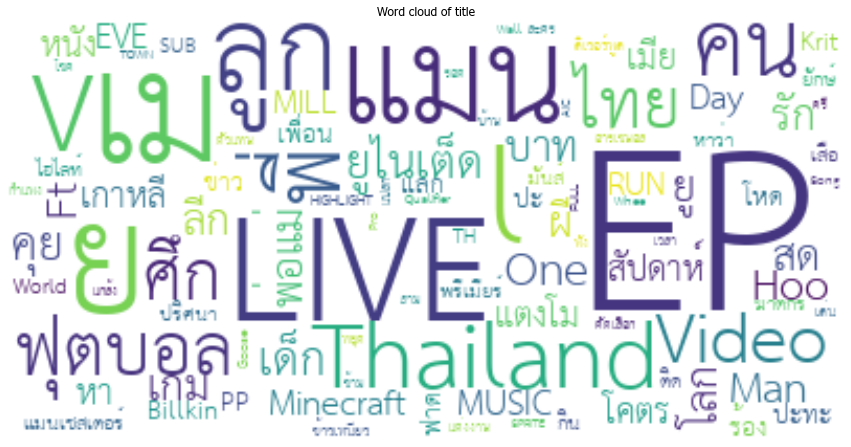

In [214]:
word_cloud(df["tokenized_title"], "Word cloud of title")

In [215]:
df["tags"] = df["tags"].apply(lambda x: str(x).split("|") if x != "[none]" else [])
df["tags"]

0      [Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...
1      [น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...
2      [kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...
3                                                     []
4      [ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...
                             ...                        
195                                [1MILL, 1of1, ONLY1!]
196    [เกม, พี่บีพี่ไวท์, พี่ไวท์, พี่บี, พี่ไวท์พี่...
197    [ช่วยเสแสร้ง, วงทัพห้า, โอม วงทัพห้า, ช่วยเสแส...
198                                          [Vlog, AAA]
199    [Bie The Ska, บี้เดอะสกา, bietheska, theskafil...
Name: tags, Length: 200, dtype: object

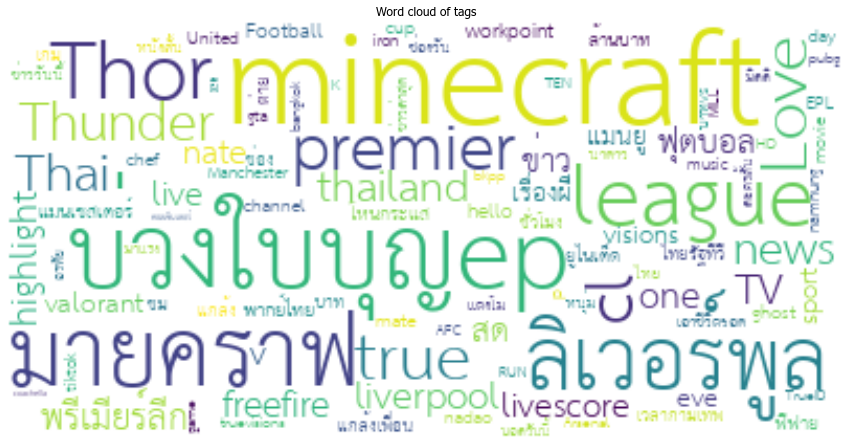

In [216]:
word_cloud(df["tags"], "Word cloud of tags")